# ECE 457B,          Winter 2021,         Tutorial 6
## Fuzzy Logic 

In this tutorial, we will learn how to use the python library [scikit-fuzzy](http://pythonhosted.org/scikit-fuzzy) to create membership functions and perform logic operations on them.

You'll need to install the library using the following commands:
* pip:
```
pip install scikit-fuzzy
```
* Conda:
```
conda install -c conda-forge scikit-fuzzy
```

Of course, you're free to use other languages. Matlab is a good alternative (which we will explore in the tutorial as well).

In [17]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Creating membership functions

Assume we have a variable, s, corresponding to car speed and that we want to define 3 fuzzy sets over this variable, "slow", "moderate", and "fast".

We'll begin by defining the range of values s can take (i.e., the universe of discourse), say from 0 to 200 km/hr in increments of 1 km/hr. We'll display the first 20 values.

In [19]:
s = np.linspace(0,200,201)
print(s[:20])


[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19.]


Once we've defined the universe of discourse, defining membership functions is straight-forward. Let's check a few of the popular ones before deciding on suitable ones for our 3 fuzzy sets. All memership functions in scikit-fuzzy follow the same api: the first argument is the universe of disource variable, followed by the function-specifc parameters.

## Triangular membership function
Remember that the triangular membership function is defined by 3 parameters:
* a: lift-off-from-zero point
* b: the peak point
* c: back-to-zero point. 

The function expects these 3 parameters to be passed as an array to the second argument.

In [20]:
mf = fuzz.trimf(s, [0, 30, 60])

Let's visualize it with matplotlib.

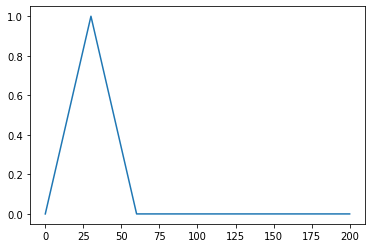

In [21]:
plt.plot(s, mf)

## Trapezoidal membership function
The trapezoidal function has an extra parameter compared to the traingular one, since we need to define the 2 the ends of the peak plateau.

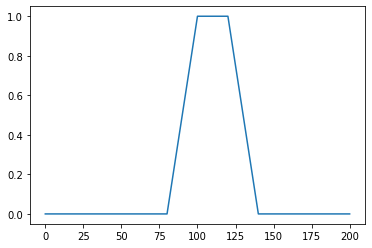

In [6]:
mf = fuzz.trapmf(s, [80, 100, 120, 140])
plt.plot(s, mf)

## Generalized bell membership function
This function is more flexible (hence the "generalized" in the name!), and has 3 parameters: 
* a: controls the widht
* b: controls the slope
* c: controls the centre. 

(This is how the function here is defined, although at the time of writing the documentation had the correspondence wrong. Also, note that they could be defined differently elsewhere -- check the equation.) The 3 parameters are not passed as an array here, but as separate arguments.

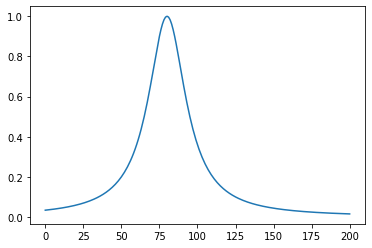

In [27]:
mf = fuzz.gbellmf(s, 15, 1, 80)
plt.plot(s, mf)

The 3 membership functions we've seen so far increase from 0, peak at 1, and then go back to 0. But what if we need to define a function that stays at 1 to either to the left or right of the peak? Enter smf and zmf.

## S membership function
This function starts at 0 and ends at 1, hence the name "S". It is defined by two parameters, the lift-off-from zero point and the reaches-one point.

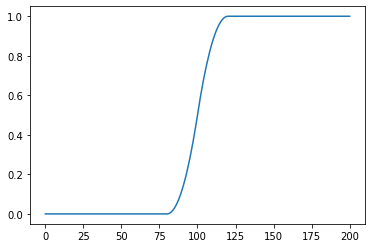

In [28]:
mf = fuzz.smf(s, 80, 120)
plt.plot(s, mf)

## Z membership function
This is the opposite of the "S" function.

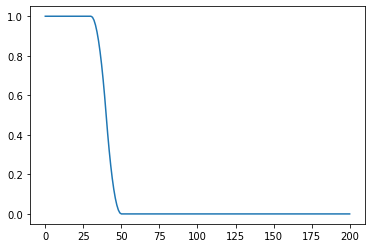

In [29]:
mf = fuzz.zmf(s, 30, 50)
plt.plot(s, mf)

## Back to "slow", "moderate", and "fast"
Having seen some of the available membership functions, which one do you think we should use to define each of the 3 fuzzy sets?

There is obviously some subjectivity involved in defining these functions, but most people would agree that if a speed is "slow", then a lower speed is also "slow". In terms of membership grades, a speed's membership grade in the set "slow" is at least as high as than the membership grades of all higher speed values in the same set. Given this common sense understanding of the concept "slow", it may be appropriate to use a Z membership function to represent it. (One might disagree with this. Suppose there is another set "extremely slow". Then we may want the support set of "slow" to be a range of values that does not extend to zero. The designer of a fuzzy system has some degree of freedom in defining membership functions.)

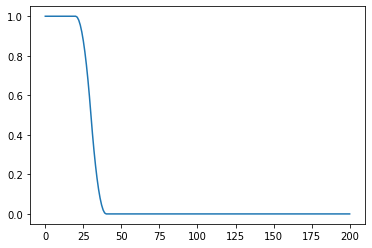

In [30]:
mf_s_slow = fuzz.zmf(s, 20, 40)
plt.plot(s, mf_s_slow)

With the same logic, we'll use an S membership function for fast.

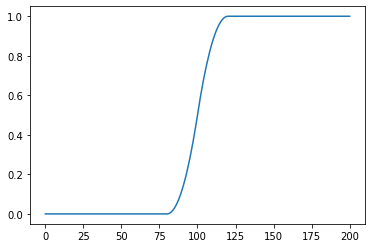

In [38]:
mf_s_fast = fuzz.smf(s, 80, 120)
plt.plot(s, mf_s_fast)

Finally, we'll use a generalized bell membership function for "moderate".

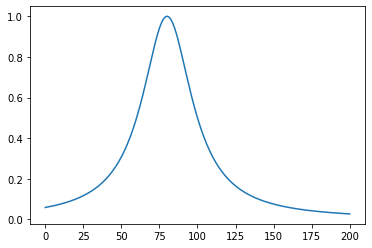

In [42]:
# mf_s_moderate = fuzz.trapmf(s, [30, 60, 80, 100])
mf_s_moderate = fuzz.gbellmf(s,20,1,80)
plt.plot(s, mf_s_moderate)

Text(0, 0.5, 'membership grade')

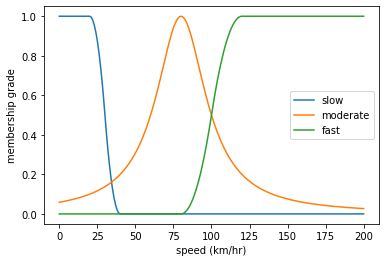

In [43]:
plt.plot(s, mf_s_slow, s, mf_s_moderate, s, mf_s_fast)
plt.legend(['slow', 'moderate', 'fast'])
plt.xlabel('speed (km/hr)')
plt.ylabel('membership grade')

# Fuzzy logic operators

The most popular and useful operators are: "Not", "Or", and "And". They correspond to set complement, union, and intersection, respectively.

There is no unique way to define these operators. Different functions can represent, say, "And", as long as they satisfy a set of conditions. Nonetheless, most commonly, we use:
* subtraction from 1 to implement "Not"
* the maximum function to implement "Or"
* the minimum function to implement "And".

In scikit-fuzzy we can implement these using the functions ```fuzzy_not```
, ```fuzzy_or```, and ```fuzzy_and```.

## Not

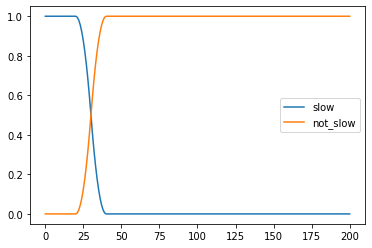

In [40]:
mf_s_not_slow = fuzz.fuzzy_not(mf_s_slow)
plt.plot(s, mf_s_slow, s, mf_s_not_slow)
plt.legend(['slow', 'not_slow'])

## Or

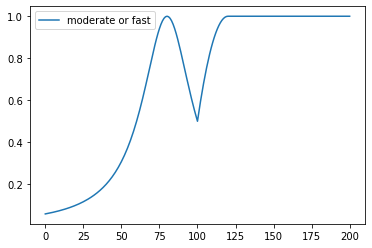

In [44]:
_, mf_s_moderate_or_fast = fuzz.fuzzy_or(s, mf_s_moderate, s, mf_s_fast)
plt.plot(s, mf_s_moderate_or_fast)
plt.legend(['moderate or fast'])

Note how the "Or" is simply a maximum over the 2 membership function. Also note that these examples are for demonstration purposes; they don't necessarily make sense.

## And

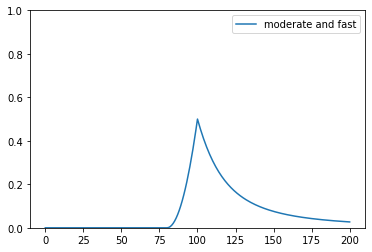

In [45]:
_, mf_s_moderate_and_fast = fuzz.fuzzy_and(s, mf_s_moderate, s, mf_s_fast)
plt.plot(s, mf_s_moderate_and_fast)
plt.ylim(0,1.0)
plt.legend(['moderate and fast'])

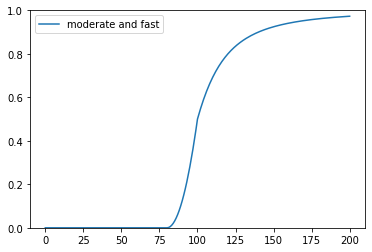

In [46]:
_, mf_s_moderate_and_fast = fuzz.fuzzy_and(s, fuzz.fuzzy_not(mf_s_moderate), s, mf_s_fast)
plt.plot(s, mf_s_moderate_and_fast)
plt.ylim(0,1.0)
plt.legend(['moderate and fast'])